## Parsing dates, JSON


The Twiiter social network has a lot of public messages, and many can be downloaded freely. A sample of these is saved into `data/twitter_sample.gz`.
1, First read the compressed file with the following command:

```
import gzip
[json.loads(str(s).strip("\r\n")) for s in gzip.open("../data/twitter_sample.gz",mode="rt").readlines()]
```
and then compare it with the similar purpose pandas code
```
pd.read_json("./data/twitter_sample.gz",lines=True)
```

2, The `created_at` column contains the date when messages were sent. **Plot** how many tweets were sent every minute by the users! Use the `strptime()` and `strftime()` functions from the **datetime** module, which are described in detail [here](https://www.tutorialspoint.com/python/time_strptime.htm) and [here](https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior).

Mind that not all entries have `created_at` value, and you should drop those!

### Solution

In [1]:
import pandas as pd
import json
from datetime import datetime

In [2]:
# First read it is a list of json items
import gzip
l = [json.loads(str(s).strip("\r\n")) for s in gzip.open("./data/twitter_sample.gz",mode="rt").readlines()]
df = pd.DataFrame.from_dict(l)

# we will go through each step using the first read

# This is how it is done with pandas. In the last part we will use this one.
rdf = pd.read_json("./data/twitter_sample.gz",lines=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 19990 non-null  object 
 1   id                         19990 non-null  float64
 2   id_str                     19990 non-null  object 
 3   text                       19990 non-null  object 
 4   source                     19990 non-null  object 
 5   truncated                  19990 non-null  object 
 6   in_reply_to_status_id      3725 non-null   float64
 7   in_reply_to_status_id_str  3725 non-null   object 
 8   in_reply_to_user_id        4901 non-null   float64
 9   in_reply_to_user_id_str    4901 non-null   object 
 10  in_reply_to_screen_name    4901 non-null   object 
 11  user                       19990 non-null  object 
 12  geo                        5548 non-null   object 
 13  coordinates                5548 non-null   obj

In [4]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 19990 non-null  datetime64[ns, UTC]
 1   id                         19990 non-null  float64            
 2   id_str                     19990 non-null  float64            
 3   text                       19990 non-null  object             
 4   source                     19990 non-null  object             
 5   truncated                  19990 non-null  float64            
 6   in_reply_to_status_id      3725 non-null   float64            
 7   in_reply_to_status_id_str  3725 non-null   float64            
 8   in_reply_to_user_id        4901 non-null   float64            
 9   in_reply_to_user_id_str    4901 non-null   float64            
 10  in_reply_to_screen_name    4901 non-null   object             
 11  us

The type of the `created at` column is different. We will need it as date, or datetime. Datetime conversion is an important and it looks a bit complicated at the first glance, but the **datetme** package separately or the **to_datetime** wrapper function within pandas (you can check it's manual by typing `?pd.to_datetime`)

In [5]:
#Let's see how the conversion goes
adate = df.iloc[0,0]
adate

'Sun Apr 19 19:18:30 +0000 2015'

In [6]:
# Recognize the string with a given date format
date_d = datetime.strptime(adate,'%a %b %d %H:%M:%S +0000 %Y')
date_d

datetime.datetime(2015, 4, 19, 19, 18, 30)

In [7]:
# print out only the hours
datetime.strftime(date_d,'%H')

'19'

In [8]:
# Let's define a function that we will apply to the whole column
def date_transform(r_v):
    return datetime.strptime(r_v,'%a %b %d %H:%M:%S +0000 %Y')

df.apply(lambda d: datetime.strptime(d,'%a %b %d %H:%M:%S +0000 %Y'))

TypeError: strptime() argument 1 must be str, not Series

In [9]:
# It gives us an error because there are non string values as well
df.created_at[df.created_at.apply(type) != type('str')]

8121     NaN
8125     NaN
8137     NaN
16001    NaN
16003    NaN
16008    NaN
16423    NaN
16425    NaN
16428    NaN
18362    NaN
Name: created_at, dtype: object

In [10]:
# We can't really do much with NaNs so we will drop them
clean_df=df.dropna(subset=['created_at'])

In [11]:
# Now we can apply it safely
clean_df.created_at = clean_df.created_at.apply(lambda d: datetime.strptime(d,'%a %b %d %H:%M:%S +0000 %Y'))
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19990 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   created_at                 19990 non-null  datetime64[ns]
 1   id                         19990 non-null  float64       
 2   id_str                     19990 non-null  object        
 3   text                       19990 non-null  object        
 4   source                     19990 non-null  object        
 5   truncated                  19990 non-null  object        
 6   in_reply_to_status_id      3725 non-null   float64       
 7   in_reply_to_status_id_str  3725 non-null   object        
 8   in_reply_to_user_id        4901 non-null   float64       
 9   in_reply_to_user_id_str    4901 non-null   object        
 10  in_reply_to_screen_name    4901 non-null   object        
 11  user                       19990 non-null  object        
 12  geo 

/tmp/ipykernel_18703/3690202265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.created_at = clean_df.created_at.apply(lambda d: datetime.strptime(d,'%a %b %d %H:%M:%S +0000 %Y'))


Now we can plot the number of tweets per minute

In [12]:
tweets_per_minute_df = clean_df.groupby("created_at").size()
tweets_per_minute_df

created_at
2015-04-19 19:18:30    1
2015-04-19 19:18:31    4
2015-04-19 19:18:32    7
2015-04-19 19:18:33    8
2015-04-19 19:18:34    6
                      ..
2015-04-19 20:30:02    7
2015-04-19 20:30:03    5
2015-04-19 20:30:04    4
2015-04-19 20:30:05    4
2015-04-19 20:30:06    2
Length: 4246, dtype: int64

In [14]:
# We are interested in only the minute and hour data
tweets_per_minute_df = clean_df[['created_at']]
tweets_per_minute_df.created_at = tweets_per_minute_df.created_at.apply(lambda d: datetime.strftime(d,'%H:%M'))
tweets_per_minute_df

/tmp/ipykernel_18703/40964700.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_per_minute_df.created_at = tweets_per_minute_df.created_at.apply(lambda d: datetime.strftime(d,'%H:%M'))


,created_at
0,19:18
1,19:18
2,19:18
3,19:18
4,19:18
...,...
19995,20:30
19996,20:30
19997,20:30
19998,20:30


In [21]:
# Invoke the a package for plotting 

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

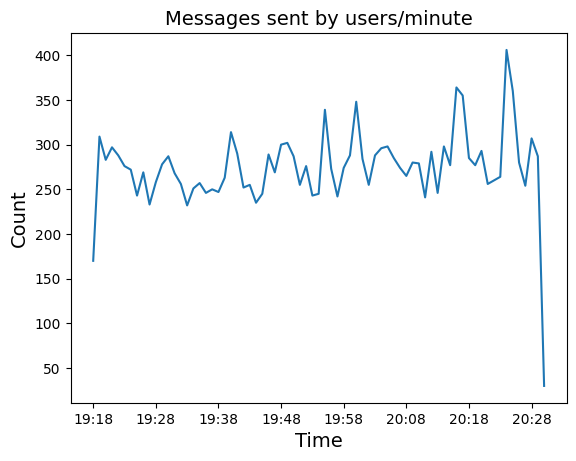

In [22]:
plt.plot(tweets_per_minute_df.groupby("created_at").size())
plt.title("Messages sent by users/minute", fontsize=14)

plt.xlabel("Time", fontsize=14)
# Use 10 times less labels/ticks on the x-axis
locator = ticker.MultipleLocator(base=10)
plt.gca().xaxis.set_major_locator(locator)

plt.ylabel("Count", fontsize=14);

So we are done. The first and last looks like they are incomplete, i.e. the collection didn't start at the beginning of the minute and was interrupted sooner than the minute had passed.

Below, the next example shows how the previous code can be shortened

In [23]:
ts=pd.DataFrame(\
    df["created_at"].dropna().\
    map(lambda d: datetime.strptime(d,'%a %b %d %H:%M:%S +0000 %Y').\
    strftime('%H:%M'))).groupby("created_at").size()

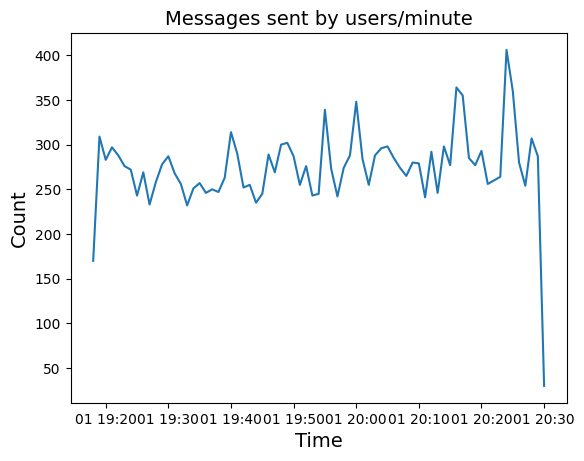

In [24]:
plt.plot(ts.index.map(lambda x: datetime.strptime(x,"%H:%M")),ts)
plt.title("Messages sent by users/minute", fontsize=14)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Count", fontsize=14);

 The second shows when the code where we load the date immedietly as a pandas dataframe

In [36]:
rdf = pd.read_json("./data/twitter_sample.gz",lines=True)

In [37]:
rdf.head(n=2)

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,favorite_count,entities,favorited,retweeted,possibly_sensitive,filter_level,lang,timestamp_ms,extended_entities,limit
0,2015-04-19 19:18:30+00:00,5.898707e+17,5.898707e+17,RT @NiallOfficial: London Friday traffic! Horr...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0.0,NaN,NaN,NaN,NaN,...,0.0,"{'hashtags': [], 'trends': [], 'urls': [], 'us...",0.0,0.0,0.0,low,en,2015-04-19 19:18:30.955,NaN,NaN
1,2015-04-19 19:18:31+00:00,5.898707e+17,5.898707e+17,RT @StereoKicks: LONDON WE'RE BUZZING!! We'll ...,"<a href=""http://twitter.com/download/android"" ...",0.0,NaN,NaN,NaN,NaN,...,0.0,"{'hashtags': [{'text': 'Periscope', 'indices':...",0.0,0.0,0.0,low,en,2015-04-19 19:18:31.072,NaN,NaN


In [38]:
result_df = pd.DataFrame(rdf["created_at"].dropna().\
    dt.strftime('%H:%M')).\
        groupby("created_at").size()
result_df.head()

created_at
19:18    170
19:19    309
19:20    283
19:21    297
19:22    288
dtype: int64

<Axes: xlabel='created_at'>

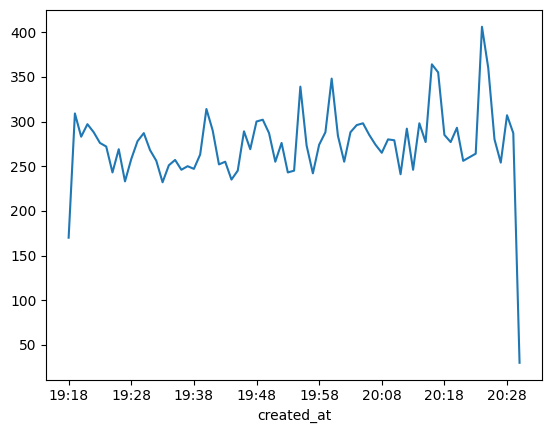

In [39]:
result_df.plot()